In [1]:
import pandas as pd

def convert_ms_to_int(e):
    return int(e[:-2])

data = pd.read_csv("refined_delay_with_excluded_files_AND_original_delay_data.csv")
data = data[data["throttleType"] == "delay"]

In [2]:
# delay_data = data[['throttleparameter', 'speed-index_numericValue', 'speed-index_score', 'lighthouse_performance', 'httpVersion', 'ttfb_mean', 'domComplete_mean', 'fullyLoaded_mean', 'firstPaint_mean']]
delay_data = data
delay_data['throttleparameter'] = delay_data['throttleparameter'].apply(convert_ms_to_int)
delay_data.sort_values(by=['throttleparameter'], inplace=True)

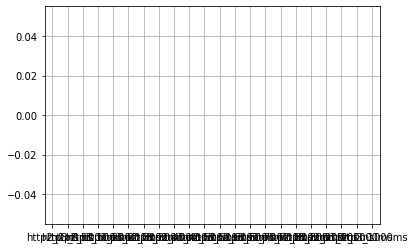

In [4]:
#Ignore this useless cell, thanks
#Seaborn is superior to matplotlib

def boxplot(field, data):
    selected = {}

    for i in range(0, 1100, 100):
        parameter = str(i) + "ms"

        http2_data = data[(data['throttleparameter'] == parameter) & (data['httpVersion'] == 2)][field]
        http3_data = data[(data['throttleparameter'] == parameter) & (data['httpVersion'] == 3)][field]
        selected['http2_' + parameter] = http2_data
        selected['http3_' + parameter] = http3_data

    boxplot_df = pd.DataFrame(selected)
    boxplot_df.boxplot()

boxplot('speed-index_numericValue', data)

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

plot = sns.boxplot(x="throttleparameter", y="speed-index_numericValue", hue="httpVersion", data=delay_data)

ValueError: Could not interpret input 'speed-index_numericValue'

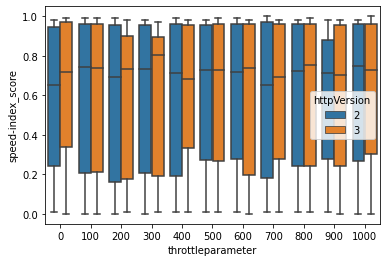

In [20]:
plot = sns.boxplot(x="throttleparameter", y="speed-index_score", hue="httpVersion", data=delay_data)

<AxesSubplot:xlabel='throttleparameter', ylabel='fullyLoaded_mean'>

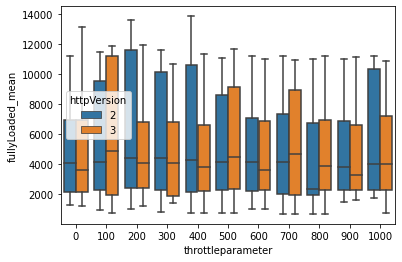

In [24]:
sns.boxplot(x="throttleparameter", y="fullyLoaded_mean", hue="httpVersion", data=delay_data)

In [6]:
# Converts time from ms to s for comparison with paper
delay_data["fullyLoaded_mean"] = delay_data["fullyLoaded_mean"].apply(lambda x: x/1000)
delay_data["speed-index_numericValue"] = delay_data["speed-index_numericValue"].apply(lambda x: x/1000)

Text(0, 0.5, 'Page Load Time [s]')

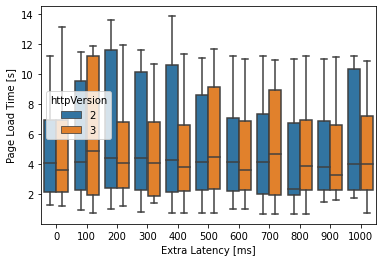

In [18]:
sns.boxplot(x="throttleparameter", y="fullyLoaded_mean", hue="httpVersion", data=delay_data)
plt.xlabel("Extra Latency [ms]")
plt.ylabel("Page Load Time [s]")

Text(0, 0.5, 'Speed Index [s]')

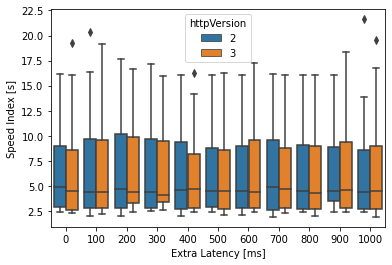

In [19]:
sns.boxplot(x="throttleparameter", y="speed-index_numericValue", hue="httpVersion", data=delay_data)
plt.xlabel("Extra Latency [ms]")
plt.ylabel("Speed Index [s]")

In [8]:
delay_data[['url', 'throttleparameter', 'lighthouse_performance_median', 'lighthouse_performance_mean']]

,url,throttleparameter,lighthouse_performance_median,lighthouse_performance_mean
610,https://www.instagram.com/,0,0.71,0.7100
575,https://www.canva.com/,0,0.53,0.5267
574,https://www.instagram.com/,0,0.45,0.4500
573,https://www.facebook.com/,0,0.77,0.7700
572,https://www.vk.com/,0,0.46,0.4600
...,...,...,...,...
785,https://www.canva.com/,1000,0.52,0.5233
784,https://www.instagram.com/,1000,0.47,0.4633
783,https://www.facebook.com/,1000,0.76,0.7633
853,https://www.glassdoor.com/,1000,0.19,0.1900


<AxesSubplot:xlabel='throttleparameter', ylabel='lighthouse_performance_mean'>

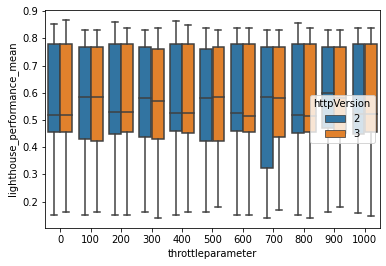

In [5]:
sns.boxplot(x="throttleparameter", y="lighthouse_performance_median", hue="httpVersion", data=delay_data)

# Obtaining the plot of average lighthouse performance for each delay

In [ ]:
means = delay_data[['throttleparameter', 'lighthouse_performance_median', 'httpVersion']]
means = means.groupby(['throttleparameter'])

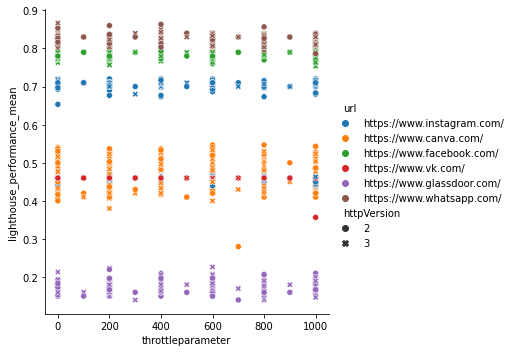

In [16]:
sns.relplot(x='throttleparameter', y='lighthouse_performance_mean', hue='url', style='httpVersion', data=delay_data)

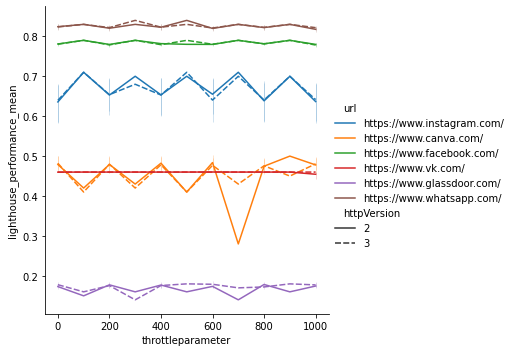

In [18]:
sns.relplot(x='throttleparameter', y='lighthouse_performance_mean', hue='url', style='httpVersion', data=delay_data, kind="line")

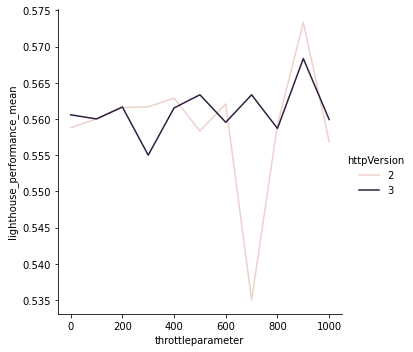

In [24]:
sns.relplot(x='throttleparameter', y='lighthouse_performance_mean', hue='httpVersion', ci=None, data=delay_data, kind="line")

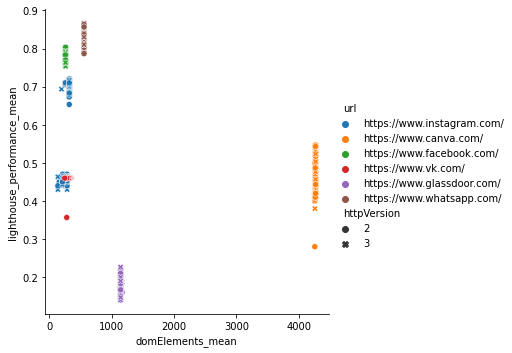

In [17]:
sns.relplot(x='domElements_mean', y='lighthouse_performance_mean', hue='url', style='httpVersion', data=delay_data)